In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


file_git = 'https://raw.githubusercontent.com/florfede/royalty-forecasting-timeseries/refs/heads/main/data/dataset.csv'
df = pd.read_csv(file_git)

## 1. Boxplot of Royalties Distribution per Artist

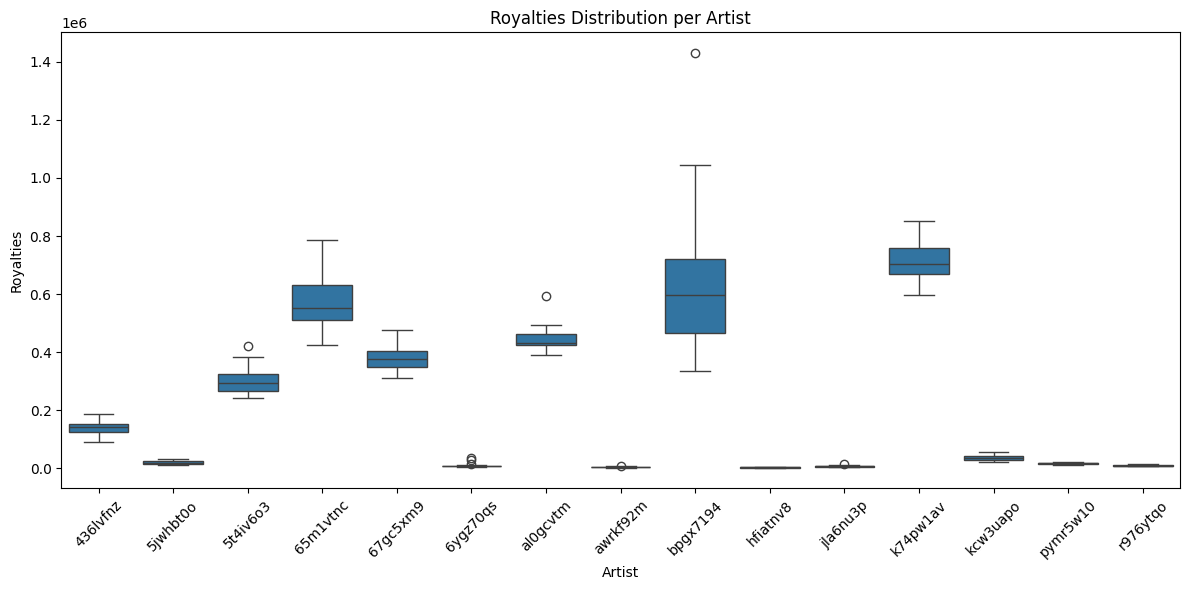

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x="artist_id", y="royalties", data=df)
plt.xticks(rotation=45)
plt.title("Royalties Distribution per Artist")
plt.xlabel("Artist")
plt.ylabel("Royalties")
plt.tight_layout()
plt.savefig("boxplot_royalties_per_artist.png")
plt.show()


1. Artists with High Earnings and Variability:

- bpgx7194, k74pw1av, and 65m1vtnc show high royalty values and also large dispersion (high IQR), which suggests high but volatile income.
- bpgx7194 even has extremely high outliers, indicating exceptionally successful months.

2. Artists with Low but Stable Earnings:

- 5jwhbt0o, awrkf92m, hfiatnv8, and jla6nu3p have small boxes close to zero. This suggests low and relatively stable income.

3. Artists with Interesting Outliers:

- al0gcvtm and 6ygz70qs have outliers much higher than their median.
  In the case of 6ygz70qs, one of the months with unusually high royalties coincides with a track release (`track_release = 1`) and elevated positive sentiment on social media.
  The artist al0gcvtm had a spike in royalties in January 2021 despite not releasing a track that month. This could be due to accumulated plays from a previous hit, algorithmic boosts on Spotify, or delayed royalty payments from prior streams.


## 2. Royalties Timeline per Artist

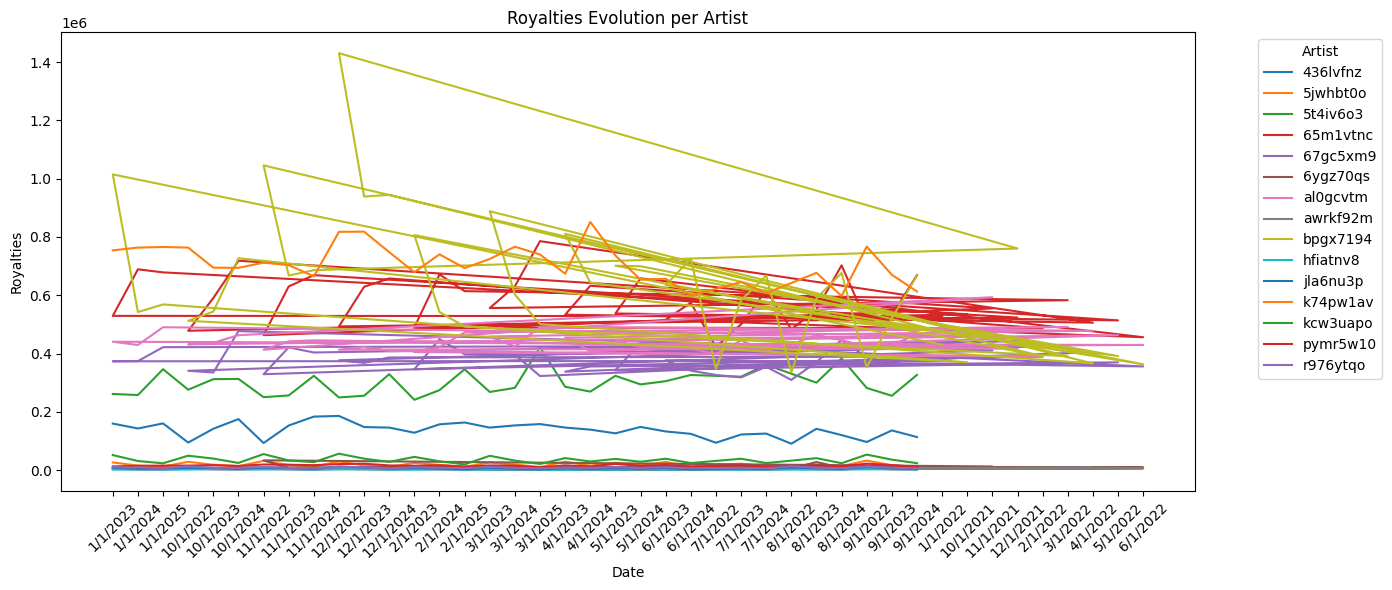

In [3]:
plt.figure(figsize=(14, 6))

for artist_id in df["artist_id"].unique():
    df_artist = df[df["artist_id"] == artist_id].sort_values("date")
    plt.plot(df_artist["date"], df_artist["royalties"], label=artist_id)

plt.title("Royalties Evolution per Artist")
plt.xlabel("Date")
plt.ylabel("Royalties")
plt.legend(title="Artist", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("royalties_timeline_per_artist.png")
plt.show()


1. Artists with High and Variable Earnings:
* bpgx7194 (yellow): Shows sharp peaks exceeding one million, but also abrupt drops. While there is no clear trend, its income is irregular and may depend on campaigns or specific events.

* k74pw1av and 65m1vtnc (red and magenta): Generally have high royalty values. In the case of k74pw1av, there is a slight downward trend in the most recent months, which may indicate a decline in performance. 65m1vtnc appears to maintain more stability.

2. Artists with Stable Trajectories:
* 67gc5xm9, 5t4iv6o3, and kcw3uapo show relatively steady lines over time. This suggests a solid base of streams, possibly due to having an active and consistent catalog.

3. Artists with Low Earnings:
* pymr5w10, r976ytqo, and awrkf92m consistently show low income. This may be due to lower presence on streaming platforms or a more recently developing career.


## 3. Scatter Plot of Mean vs. Standard Deviation of Royalties

In [4]:
# Ensure the 'date' column is in datetime format
df["date"] = pd.to_datetime(df["date"])

# Group by artist and compute summary statistics
grouped = df.groupby("artist_id")

summary_stats = pd.DataFrame({
    "record_count": grouped.size(),
    "mean_royalties": grouped["royalties"].mean(),
    "std_royalties": grouped["royalties"].std(),
    "max_royalties": grouped["royalties"].max(),
    "min_royalties": grouped["royalties"].min(),
    "null_values": grouped.apply(lambda x: x.isna().sum().sum())
}).reset_index()


In [5]:
import plotly.express as px

fig = px.scatter(
    summary_stats,
    x="mean_royalties",
    y="std_royalties",
    color="artist_id",
    text="artist_id",
    title="Mean vs Standard Deviation of Royalties per Artist",
    labels={
        "mean_royalties": "Mean Royalties",
        "std_royalties": "Standard Deviation of Royalties"
    },
    width=900,
    height=700
)

# Show labels on hover only, not all at once
fig.update_traces(textposition='top center', marker=dict(size=10), showlegend=False)

fig.show()


This plot compares the average royalty income with its variability for each artist.  
It shows that **k74pw1av** has high earnings with relatively low variability, making them a predictable and consistent artist.  
On the other hand, **bpgx7194** also has high income but with large dispersion, suggesting a dependency on specific events or campaigns.  
At the opposite end, several low-income artists show little variation, indicating more stable trajectories but with lower impact.


In [6]:
from scipy.stats import skew

# Function to count outliers using the 1.5 * IQR rule
def count_outliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    outliers = x[(x < q1 - 1.5 * iqr) | (x > q3 + 1.5 * iqr)]
    return len(outliers)

# Group by artist
grouped = df.groupby("artist_id")

# Calculate metrics and add to summary_stats DataFrame
summary_stats["royalties_outliers"] = grouped["royalties"].apply(count_outliers).values
summary_stats["royalties_skewness"] = grouped["royalties"].apply(lambda x: skew(x.dropna())).values


## 1. Mean Royalties per Artist

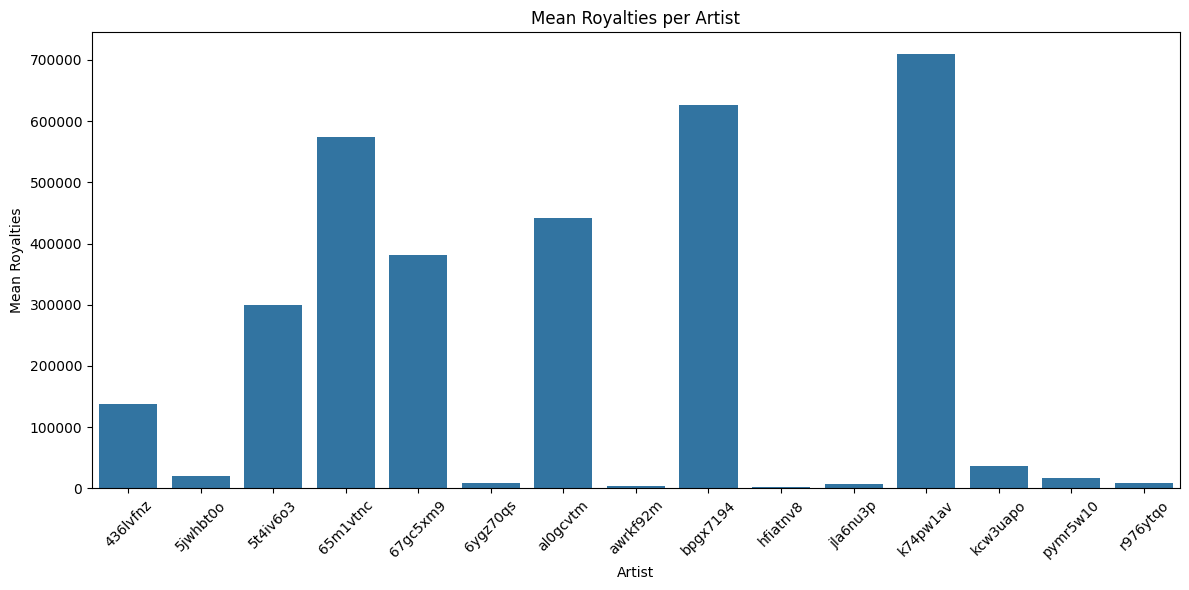

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x="artist_id", y="mean_royalties", data=summary_stats)
plt.title("Mean Royalties per Artist")
plt.xlabel("Artist")
plt.ylabel("Mean Royalties")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("mean_royalties_per_artist.png")
plt.show()


The analysis of mean royalties per artist shows that **k74pw1av** leads in average earnings, followed by **bpgx7194**, **65m1vtnc**, and **al0gcvtm**. These artists account for the highest economic performance within the group.

At the other end, artists like **awrkf92m**, **hfiatnv8**, and **r976ytqo** exhibit considerably low average earnings, which may be associated with lower exposure or an early-stage career.

Finally, intermediate cases such as **5t4iv6o3** and **67gc5xm9** could represent a segment with good potential for steady growth.


## 2. Cantidad de outliers por artista

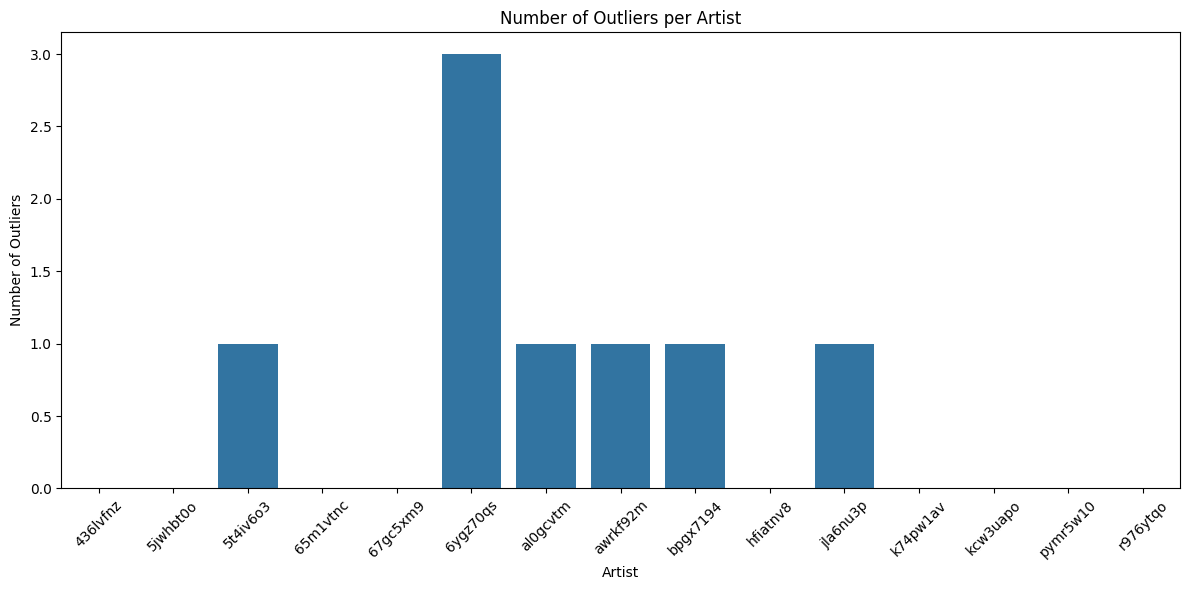

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x="artist_id", y="royalties_outliers", data=summary_stats)
plt.title("Number of Outliers per Artist")
plt.xlabel("Artist")
plt.ylabel("Number of Outliers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outliers_per_artist.png")
plt.show()


The outlier analysis of royalty income reveals that most artists show stable trajectories, without monthly earnings that deviate significantly from the average.

However, cases like **6ygz70qs**, with three outliers, display more irregular behavior—possibly associated with high-impact one-time events or accumulated payments.


## 3. Skewness of Royalties per Artist

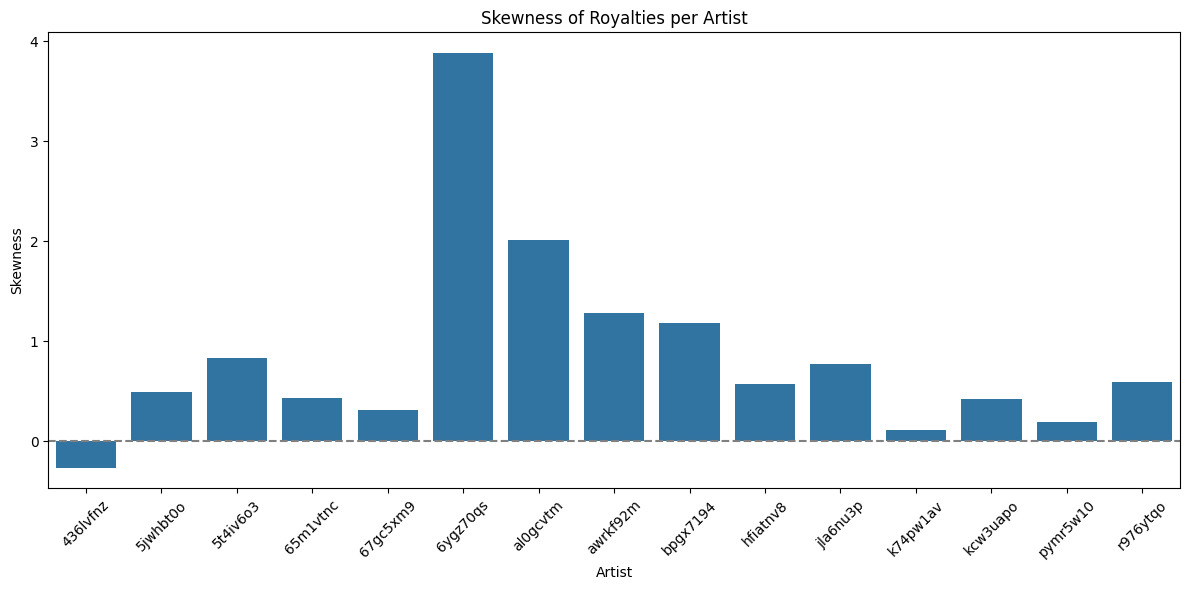

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x="artist_id", y="royalties_skewness", data=summary_stats)
plt.title("Skewness of Royalties per Artist")
plt.xlabel("Artist")
plt.ylabel("Skewness")
plt.axhline(0, color='gray', linestyle='--')  # Line indicating symmetry
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("skewness_per_artist.png")
plt.show()


The skewness analysis reveals that artists like **6ygz70qs** and **al0gcvtm** exhibit highly right-skewed distributions, reflecting months with exceptionally high income.  
This is consistent with the presence of outliers and suggests a more erratic behavior or dependency on one-off events.

In contrast, artists like **436lvfnz** and **k74pw1av** show more symmetric distributions, indicative of a more regular and predictable trajectory.


## General Conclusions of the Per-Artist Analysis

* **Data volume available:**  
Most artists have over 30 monthly records, allowing for solid time series analysis and the application of predictive models with reasonable stability.

* **Average and extreme income:**  
There are significant differences in average royalty values across artists. For example, **65m1vtnc** reaches a monthly average of \$573,914, while **5jwhbt0o** barely reaches \$19,701. These gaps may be related to levels of exposure, popularity, or the type of contract each artist has.

* **Income variability:**  
Artists like **65m1vtnc** and **5t4iv6o3** exhibit high variability in their earnings, possibly due to specific releases, campaigns, or seasonality. On the other hand, some artists show more stable income, which is advantageous for forecasting tasks.

* **Presence of outliers:**  
Overall, the number of outliers was low. However, cases like **6ygz70qs** (with three outliers) indicate irregular behavior and unusual income spikes. These may be related to specific events or accumulated payments.

* **Distribution skewness:**  
Most artists present mildly positive skewness, indicating income concentrated below the mean with occasional high peaks. **6ygz70qs** stands out for having high skewness, consistent with its irregular behavior. **436lvfnz** was the only case with negative skewness, possibly reflecting a progressive decline or an early peak followed by low earnings.

* **Missing values:**  
No missing values were found in key variables, indicating good data quality and making the dataset suitable for predictive analysis without the need for imputation.

---

## Relationship Between External Variables and Royalty Income

* **Instagram followers:**  
Show a moderate positive correlation (0.23) with royalties, suggesting that greater presence on this platform may positively influence income.

* **Track release:**  
The `track_release` variable shows a low but positive correlation (0.09). While the effect is not strong, it may have a combined impact when paired with promotional strategies.

* **Twitter followers:**  
Surprisingly, show a slightly negative correlation (-0.07) with income. This may reflect the lower effectiveness of Twitter in driving direct monetization.

* **Sentiment on social media:**  
The `sentiment` variable (calculated from Instagram comments) shows a more noticeable negative correlation (-0.15), suggesting that a more positive sentiment does not necessarily translate into higher income. This may be due to the ambiguous or non-commercial nature of certain visibility spikes.

---

## General Interpretation:

Although no external variable shows a strong correlation, **Instagram followers** appear to have some influence and could be useful in predictive or segmentation models.  
In contrast, **social sentiment** requires deeper analysis, possibly broken down by events, as its effect does not seem immediate or linear.


# Variable Importance

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# --- Define variables ---
target = "royalties"

# --- Filter predictor variables (numeric columns that DO NOT contain "royalties") ---
numeric_cols = df.select_dtypes(include=["number"]).columns
predictor_cols = [col for col in numeric_cols if "royalties" not in col.lower()]

# --- Separate X and y ---
X = df[predictor_cols]
y = df[target]

# --- Impute missing values using mean ---
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# --- Train Random Forest model ---
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_imputed, y)

# --- Get variable importance ---
importances = pd.Series(model.feature_importances_, index=predictor_cols).sort_values(ascending=False)

# Show ranking
print(importances)


instagram_followers           0.420456
twitter_followers             0.165887
mean_sentiment_3m             0.106721
sum_mentions_followers_3m     0.099864
num_comments                  0.093050
sentiment                     0.043410
growth_instagram_followers    0.020584
num_posts                     0.017789
std_instagram_followers_6m    0.010473
growth_twitter_followers      0.006596
sum_track_releases_6m         0.005857
month                         0.004924
mentions_followers            0.003918
track_release                 0.000471
dtype: float64


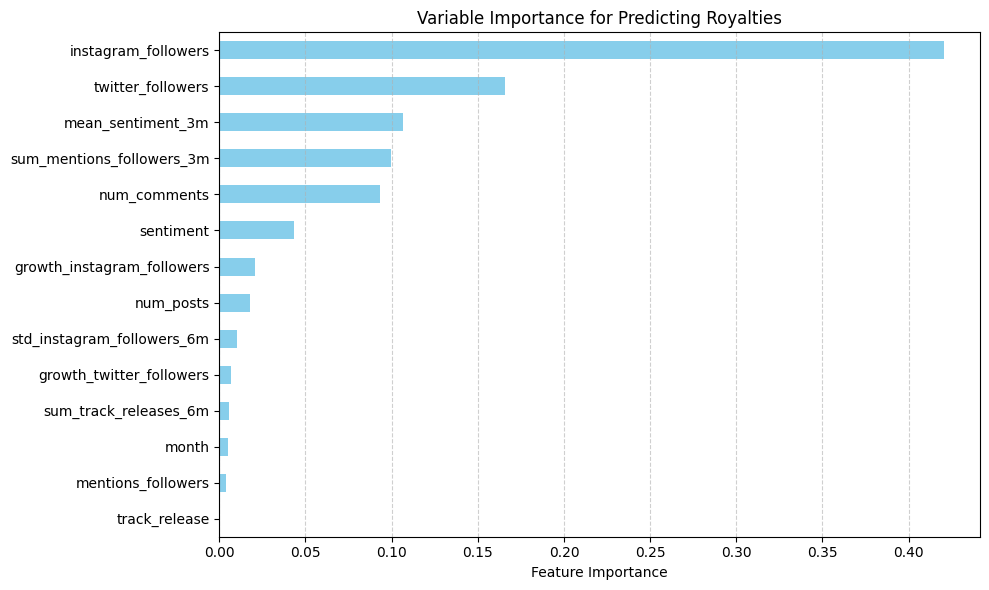

In [11]:
# --- Display importance plot ---
plt.figure(figsize=(10, 6))
importances.plot(kind="barh", color="skyblue")
plt.gca().invert_yaxis()  # Most important at the top
plt.xlabel("Feature Importance")
plt.title("Variable Importance for Predicting Royalties")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## Conclusion on the Variables that Most Influence Royalties

A Random Forest regression model was trained to identify the most relevant variables in predicting royalty income, excluding all features directly derived from royalties themselves (such as historical averages or standard deviations).

The results indicate that:

* **The number of Instagram followers** is the most influential variable, accounting for more than 40% of the model's total importance. This suggests that an artist's follower base is a strong indicator of commercial potential.

* It is followed by **Twitter followers**, **average sentiment from recent mentions**, and **audience interaction** (comments and mentions), all with relevant contributions to the model.

* Variables such as the **number of posts**, **monthly follower growth**, or **recent music releases** show considerably lower influence on income estimation.

These findings reinforce the idea that social media presence and engagement indicators—especially on Instagram—are fundamental for explaining artists' financial performance when historical payment data is not available.
